# Figure 3

In [1]:
# Import packages.
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle, Patch
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pandas as pd
# Print version numbers.
print('matplotlib', matplotlib.__version__)
print('numpy', np.__version__)
print('pandas', pd.__version__)
# Intialize my pandas preferences.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

matplotlib 3.5.2
numpy 1.22.3
pandas 1.4.2


In [2]:
# Load the datframes for figure 3.
mis_muts_ann_df = pd.read_csv('./data/muc19_72kb_denisovan_mis_muts_info.csv.gz')
protein_ann_df = pd.read_csv('./data/muc19_protein_info.csv.gz')
n_chroms_df = pd.read_csv('./data/focal_groups_chromosome_counts.csv.gz')
mis_muts_info_df = pd.read_csv('./data/focal_groups_72kb_denisovan_mis_muts_info.csv.gz')

In [3]:
# Convert the denisovan-specific missense mutation annotations datframe to a dictionary.
mis_muts_ann = {col: mis_muts_ann_df[col].values for col in mis_muts_ann_df.columns.values}
# Show the nine denisovan-specific missense mutation annotations .
mis_muts_ann_df

,Chr12 Position (Hg19),rsID,Mut. Type,Ref. Allele,Ref. Amino Acid,Denisovan Allele,Denisovan Amino Acid,Protein Position,Grantham Score,PhyloP Score
0,40808672,rs4768252,Missense,C,Ser,T,Leu,275,145,-1.220990
1,40808726,rs4768253,Missense,C,Thr,T,Met,293,81,-0.879299
2,40809983,rs142268259,Missense,C,Asp,A,Glu,410,45,-0.060835
3,40814107,rs2114566,Missense,A,Ile,G,Val,511,29,-0.188913
4,40814197,rs17467164,Missense,G,Val,A,Ile,541,29,-0.336425
5,40815060,rs149221842,Missense,C,His,T,Tyr,572,83,-0.569071
6,40821795,rs61736852,Missense,G,Glu,A,Lys,766,56,0.581063
7,40821871,rs17467284,Missense,G,Arg,T,Leu,791,102,5.150000
8,40826201,rs11564125,Missense,G,Val,A,Ile,883,29,-1.722080


In [4]:
# Show the total number of chromosomes per focal group.
n_chroms_df

,GROUP,N_CHROMS
0,DEN,2
1,CHA,2
2,VIN,2
3,ANC,46
4,MXL,128
5,PEL,170
6,CLM,188
7,PUR,208
8,AFR,1008
9,ALT,2


In [5]:
# Convert the denisovan-specific missense mutation info datframe to a dictionary.
mis_muts_info = {col: mis_muts_info_df[col].values for col in mis_muts_info_df.columns.values}
# Intialize an ordered array of focal groups.
focal_groups = np.array(['DEN', 'CHA', 'VIN', 'ANC', 'MXL', 'PEL', 'CLM', 'PUR', 'AFR', 'ALT'])
# Intialize matricies for plotting.
mis_mut_freqs = np.empty((mis_muts_ann_df.shape[0], focal_groups.size))
mis_mut_cis = np.empty((mis_muts_ann_df.shape[0], focal_groups.size))
# For every position.
for i, pos in enumerate(mis_muts_ann['Chr12 Position (Hg19)']):
    # Intialize a mask for the position.
    is_pos = mis_muts_info['POS'] == pos
    # For every focal group.
    for j, grp in enumerate(focal_groups):
        # Intialize a mask for the focal group at this position.
        is_pos_grp = is_pos & (mis_muts_info['GROUP'] == grp)
        # Update the matricies.
        mis_mut_freqs[i, j] = mis_muts_info['FREQ'][is_pos_grp][0]
        mis_mut_cis[i, j] = mis_muts_info['95_CI'][is_pos_grp][0]

In [6]:
# Intialize masks for phylop scores
is_pp_pos = mis_muts_ann['PhyloP Score'] > 0
is_pp_neg = mis_muts_ann['PhyloP Score'] < 0
# Intialize masks for the grantham score.
is_gs_high = mis_muts_ann['Grantham Score'] > 100
is_gs_low = mis_muts_ann['Grantham Score'] < 100
# Intialize a dictionary.
mis_dicc = {}
# For each granthamn effect.
for ge, ge_mask, color in [('low', is_gs_low, '#000000'), ('high', is_gs_high, '#D55E00')]:
    # Intialize a subdictionary.
    mis_dicc[ge] = {'pos': {}, 'neg': {}, 'c': color}
    # Create masks stratified by phylop score.
    pos_pp_ge_mask = is_pp_pos & ge_mask
    neg_pp_ge_mask = is_pp_neg & ge_mask
    # Fill the dictionary.
    mis_dicc[ge]['pos']['m'] = 'P'
    mis_dicc[ge]['pos']['s'] = 2
    mis_dicc[ge]['pos']['x'] = mis_muts_ann['Protein Position'][pos_pp_ge_mask]
    mis_dicc[ge]['pos']['y'] = mis_muts_ann['Grantham Score'][pos_pp_ge_mask]
    mis_dicc[ge]['pos']['rsids'] = mis_muts_ann['rsID'][pos_pp_ge_mask]
    mis_dicc[ge]['neg']['m'] = 'D'
    mis_dicc[ge]['neg']['s'] = 1
    mis_dicc[ge]['neg']['x'] = mis_muts_ann['Protein Position'][neg_pp_ge_mask]
    mis_dicc[ge]['neg']['y'] = mis_muts_ann['Grantham Score'][neg_pp_ge_mask]
    mis_dicc[ge]['neg']['rsids'] = mis_muts_ann['rsID'][neg_pp_ge_mask]

In [7]:
# Show the muc19 protein annotations.
protein_ann_df

,TYPE,START,STOP
0,INTRO_HAP,1,1074
1,VFWD1,478,649
2,VFWD2,815,995
3,VFWD3,1274,1447
4,VWFC,8159,8225
5,CTCK,8288,8376
6,CONSERVED_EXON,478,1647
7,CONSERVED_EXON,7952,8178


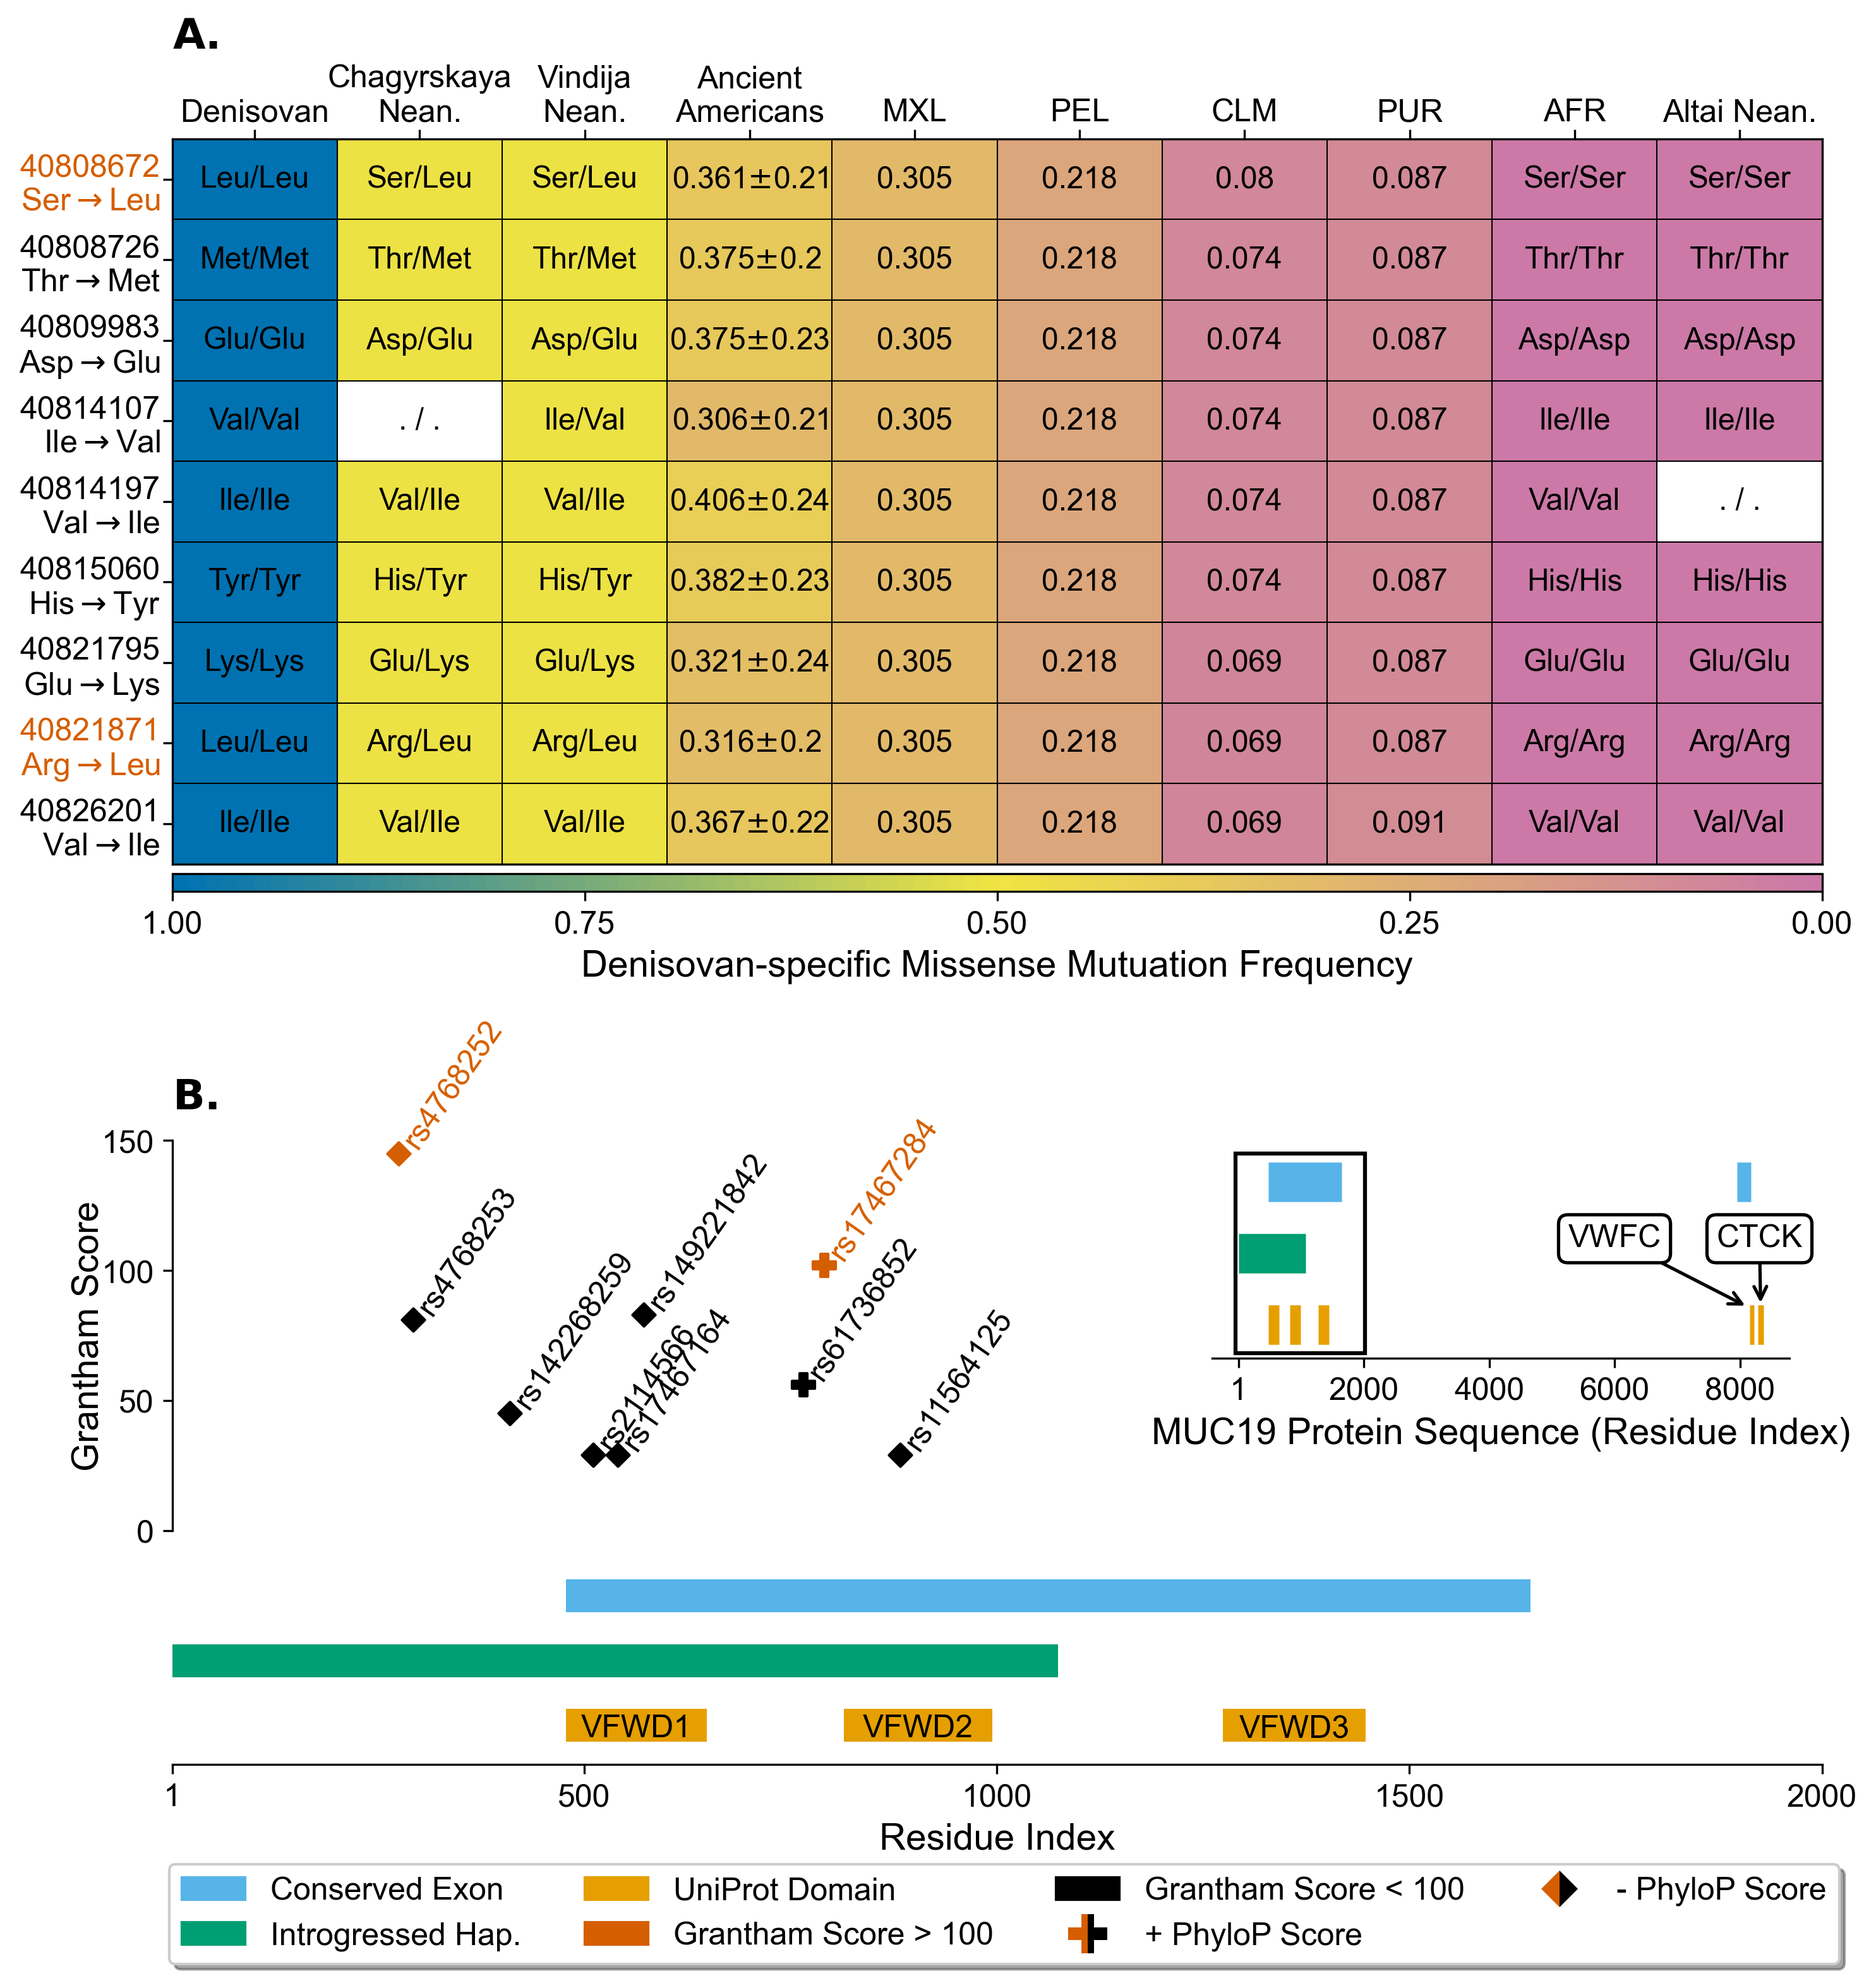

In [8]:
# Intialize the matplolib styling.
plt.rcParams.update({
    'font.family': 'Arial',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
})
# Intialize the figure.
fig = plt.figure(
    figsize=(10, 10), dpi=300,
    facecolor='white',
)
# Intialize the grid.
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 0.85])
# Intialize the axes.
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])



###############
### Panel A ###
###############

# Intialize the axes labels.
grp_labs = np.array([
    'Denisovan',
    'Chagyrskaya'+'\n'+'Nean.',
    'Vindija'+'\n'+'Nean.',
    'Ancient'+'\n'+f'Americans',
    'MXL',
    'PEL',
    'CLM',
    'PUR',
    'AFR',
    'Altai Nean.',
])
aa_subs = [
    ref+r'$\rightarrow$'+den for ref, den in zip(
        mis_muts_ann['Ref. Amino Acid'], mis_muts_ann['Denisovan Amino Acid'],
    )
]
mut_labs = np.array([
    str(pos)+'\n'+aa_sub for pos, aa_sub in zip(mis_muts_ann['Chr12 Position (Hg19)'], aa_subs)
])
# Construct the cell labels.
hom_ref_aas = [f'{aa}/{aa}' for aa in mis_muts_ann['Ref. Amino Acid']]
hom_den_aas = [f'{aa}/{aa}' for aa in mis_muts_ann['Denisovan Amino Acid']]
het_aas = [
    f'{ref_aa}/{den_aa}' for ref_aa, den_aa in zip(
        mis_muts_ann['Ref. Amino Acid'], mis_muts_ann['Denisovan Amino Acid']
    )
]
# Intialize the color map.
cmap = LinearSegmentedColormap.from_list('den_cmap', ['#CC79A7', '#F0E442', '#0072B2'], N=100)
# Plot the missense mutations
im = ax1.imshow(mis_mut_freqs, cmap=cmap, aspect='auto', vmin=0, vmax=1)
# Seperate each box and add a grid.
ax1.set_xticks(np.arange(0, mis_mut_freqs.shape[1], 1))
ax1.set_yticks(np.arange(0, mis_mut_freqs.shape[0], 1))
ax1.set_xticks(np.arange(-0.5, mis_mut_freqs.shape[1], 1), minor=True)
ax1.set_yticks(np.arange(-0.5, mis_mut_freqs.shape[0], 1), minor=True)
ax1.grid(which='minor', color='black',linestyle='-', linewidth=0.5)
# Remove the ticks.
ax1.tick_params(bottom=False, labelbottom=False)
ax1.tick_params(which='minor', left=False, bottom=False, labelbottom=False)
# Add a border.
ax1.spines['top'].set_visible(True)
ax1.spines['bottom'].set_visible(True)
ax1.spines['right'].set_visible(True)
ax1.spines['left'].set_visible(True)
# Intialize the positions for the colobar.
divider = make_axes_locatable(ax1)
cax = divider.append_axes('bottom', size='2.5%', pad=0.05)
cbar = fig.colorbar(im, cax=cax, orientation='horizontal', ticks=[0, 0.25, 0.5, 0.75, 1])
cax.invert_xaxis()
# Annotate the colobar.
cbar.set_label('Denisovan-specific Missense Mutuation Frequency')
# For every focal group.
for x, grp in enumerate(focal_groups):
        # For every denisovan-specific missense mutation.
        for y in range(mis_mut_freqs.shape[0]):
            # If this is the denisovan.
            if grp == 'DEN':
                # Annotate the amino acid.
                ax1.text(
                    x, y, hom_den_aas[y], size=11.5,
                    ha='center', va='center', color='black',
                )
            # Else-if this is a late neanderthal.
            elif grp in ['CHA', 'VIN']:
                # If the site didn't pass qc.
                if np.isnan(mis_mut_freqs[y, x]):
                    # Annotate the missing data.
                    ax1.text(
                        x, y, '. / .', size=11.5,
                        ha='center', va='center', color='black',
                    )
                # Else.
                else:
                    # Annotate the amino acid.
                    ax1.text(
                        x, y, het_aas[y], size=11.5,
                        ha='center', va='center', color='black',
                    )
            # Else-if this is afr or the altai neanderthal.
            elif grp in ['AFR', 'ALT']:
                # If the site didn't pass qc.
                if np.isnan(mis_mut_freqs[y, x]):
                    # Annotate the missing data.
                    ax1.text(
                        x, y, '. / .', size=11.5,
                        ha='center', va='center', color='black',
                    )
                # Else.
                else:
                    # Annotate the amino acid.
                    ax1.text(
                        x, y, hom_ref_aas[y], size=11.5,
                        ha='center', va='center', color='black',
                    )
            # Else-if, this the ancient american group.
            elif grp == 'ANC':
                # Annotate the denisovan missense mutation frequency and 95% cis.
                ax1.text(
                    x, y, fr'{round(mis_mut_freqs[y, x], 3)}$\pm${round(mis_mut_cis[y, x], 2)}', size=11.5,
                    ha='center', va='center', color='black',
                )
            # Else, this is a modern admixed american population.
            else:
                ax1.text(
                    x, y, fr'{round(mis_mut_freqs[y, x], 3)}', size=11.5,
                    ha='center', va='center', color='black',
                )
# Move the ticks on top of the row.
ax1.tick_params(top=True, labeltop=True, pad=1)
# Set and label the x-axis and y-axis ticks.
ax1.set_xticks(np.arange(grp_labs.size), labels=grp_labs)
ax1.set_yticks(np.arange(mut_labs.size), labels=mut_labs)
# For every y-tick label.
for ticklabel, high_low in zip(ax1.get_yticklabels(), is_gs_high):
    # If this mutation has a high grantham score.
    if high_low:
        # Adjust the color to match panel b.
        ticklabel.set_color('#D55E00')



##############################
### Panel B (Focal Region) ###
##############################

# For every grantham effect.
for ge in ['low', 'high']:
    # For every phylop sign.
    for pp in ['neg', 'pos']:
        # Plot the results.
        ax2.scatter(
            mis_dicc[ge][pp]['x'], mis_dicc[ge][pp]['y'],
            color=mis_dicc[ge]['c'], marker=mis_dicc[ge][pp]['m'], s=(37.5 * mis_dicc[ge][pp]['s']),
        )
        # For every coding mutation.
        for i, rsid in enumerate(mis_dicc[ge][pp]['rsids']):
            # Annotate the results.
            ax2.text(
                mis_dicc[ge][pp]['x'][i], mis_dicc[ge][pp]['y'][i], rsid,
                rotation=55, color=mis_dicc[ge]['c'], fontsize=12, va='bottom',
            )
# Iterate through the protein annotatation.
for _, row in protein_ann_df.iterrows():
    # Unpack the annotation.
    ann, start, stop = row.TYPE, row.START, row.STOP
    # If this is first conserved exon.
    if (ann == 'CONSERVED_EXON') and (start == 478):
        # Plot the annotation.
        ax2.hlines(y=(1 * -25), xmin=start, xmax=stop, color='#56B4E9', linewidth=12.5)
    # Else-if this is the introgressed haplotype.
    elif ann == 'INTRO_HAP':
        # Plot the annotation.
        ax2.hlines(y=(2 * -25), xmin=start, xmax=stop, color='#009E73', linewidth=12.5)
    # Else-if this is one of the three focal domains.
    elif ann in ['VFWD1', 'VFWD2', 'VFWD3']:
        # Plot the annotation.
        ax2.hlines(y=(3 * -25), xmin=start, xmax=stop, color='#E69F00', linewidth=12.5)
        # Compute the midpoint.
        mid = (start + stop) / 2
        # Annotate the domain.
        ax2.text(mid, (3 * -25), ann, fontsize=12, ha='center', va='center_baseline')
# Configure the y-axis.
ax2.set_yticks(np.arange(0, 200, 50))
ax2.spines['left'].set_bounds(0, ax2.get_yticks()[-1])
ax2.set_ylim(bottom=-90)
# Configure the x-axis
ax2.set_xticks([1]+[(500 * i) for i in range(1, 5)], labels=['1']+[str(500 * i) for i in range(1, 5)])
ax2.set_xlim(1, 2000)
# Label the axes.
ax2.set_xlabel('Residue Index')
ax2.set_ylabel('Grantham Score')
ylab_pos = ax2.get_yticks()[-1] / 2
ax2.yaxis.set_label_coords(-0.04, ylab_pos, transform=ax2.get_yaxis_transform())
# Intilaize a title list.
title_list = [
    r'$\bf{A.}$',
    r'$\bf{B.}$',
]
# For each subplot.
for ax, title in zip([ax1, ax2], title_list):
    # Plot the title.
    ax.set_title(title, loc='left')
# Enforce a tight layout.
plt.tight_layout()
# Add a legend.
fig.legend(
    handles=[
        Patch(color='#56B4E9', label='Conserved Exon'),
        Patch(color='#009E73', label='Introgressed Hap.'),
        Patch(color='#E69F00', label='UniProt Domain'),
        Patch(color='#D55E00', label='Grantham Score > 100'),
        Patch(color='#000000', label='Grantham Score < 100'),
        Line2D(
            [0], [0], linestyle='none', marker='P', markersize=15, color='#D55E00', markeredgecolor='none',
            markerfacecolor='#D55E00', markerfacecoloralt='#000000', fillstyle='left', label='+ PhyloP Score',
        ),
        Line2D(
            [0], [0], linestyle='none', marker='D', markersize=10, color='#D55E00', markeredgecolor='none',
            markerfacecolor='#D55E00', markerfacecoloralt='#000000', fillstyle='left', label='- PhyloP Score',
        ),
    ],
    loc='lower center', bbox_to_anchor=(0.535, -0.05), ncol=4, frameon=True, fancybox=True, shadow=True,
)


#############################
### Panel B (Full Region) ###
#############################

# Intialize the focal region plot.
inset_ax2 = inset_axes(
    ax2, width='35%', height='35%',
    loc='upper right', bbox_to_anchor=(-0.01, 0.01, 1, 1),
    bbox_transform=ax2.transAxes,
)
# Iterate through the protein annotatation.
for _, row in protein_ann_df.iterrows():
    # Unpack the annotation.
    ann, start, stop = row.TYPE, row.START, row.STOP
    # If this is first conserved exon.
    if ann == 'CONSERVED_EXON':
        # Plot the annotation.
        inset_ax2.hlines(y=(0 * -15), xmin=start, xmax=stop, color='#56B4E9', linewidth=15)
    # Else-if this is the introgressed haplotype.
    elif ann == 'INTRO_HAP':
        # Plot the annotation.
        inset_ax2.hlines(y=(1 * -15), xmin=start, xmax=stop, color='#009E73', linewidth=15)
    # Else, this is a uniprot domains.
    else:
        # Plot the annotation.
        inset_ax2.hlines(y=(2 * -15), xmin=start, xmax=stop, color='#E69F00', linewidth=15)
# Configure the x-axis
inset_ax2.set_xticks([1]+[(2000 * i) for i in range(1, 5)], labels=['1']+[str(2000 * i) for i in range(1, 5)])
inset_ax2.set_xlabel('MUC19 Protein Sequence (Residue Index)')
# Configure the y-axis.
inset_ax2.set_ylim(-37, 10)
inset_ax2.spines['left'].set_visible(False)
inset_ax2.tick_params(axis='y', which='both', left=False, labelleft=False)
# Plot the a box around the focal region zoomed in on.
focal_box = plt.Rectangle(
    (-50, -36), 2065, 42,
    linewidth=1.5, linestyle='solid',
    edgecolor='black', facecolor='none',
)
inset_ax2.add_patch(focal_box)
# Annotate the domains not in the focal region.
inset_ax2.annotate(
    'VWFC', 
    xy=(8159, -26.5),
    xytext=(6000, -15),
    arrowprops=dict(arrowstyle='->', lw=1.25, shrinkA=0),
    ha='center', va='bottom', fontsize=12,
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=1.25),
)
inset_ax2.annotate(
    'CTCK', 
    xy=((8288 + 8376) / 2, -26.5),
    xytext=(((8288 + 8376) / 2) - 20, -15),
    arrowprops=dict(arrowstyle='->', lw=1.25, shrinkA=0),
    ha='center', va='bottom', fontsize=12,
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=1.25),
)



#################
### Exporting ###
#################

# Export the plot.
plt.savefig(
    './main_figures/png/figure_3.png', format='png',
    facecolor='white', bbox_inches='tight', dpi=500,
)
plt.savefig(
    './main_figures/svg/figure_3.svg', format='svg',
    facecolor='white', bbox_inches='tight', dpi=500,
)
plt.savefig(
    './main_figures/pdf/figure_3.pdf', format='pdf',
    facecolor='white', bbox_inches='tight', dpi=500,
)
# Show the plot.
plt.show()